In [1]:
import os
import pandas as pd
import numpy as np
import glob
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import hashlib
import cv2

In [2]:
def calculate_hash(im):
    # création d'un objet de type md5
    md5 = hashlib.md5()
    # calcul de l'empreinte md5
    md5.update(np.array(im).tobytes())
    # retour md5 en format hexadécimal
    return md5.hexdigest()

In [9]:
# Chemin du répertoire contenant les images
repertoire = r'D:\aprojet\fev24_cds_plants\data\color'

# Liste pour stocker les informations sur les images
donnees = []

# Parcours des sous-répertoires et des fichiers
for dossier, sous_dossiers, fichiers in os.walk(repertoire):
    for nom_fichier in glob.glob(os.path.join(dossier, '*.jpg')):
        chemin_image = nom_fichier
        # récupération de la classe à partir du nom de dossier
        classe = os.path.basename(dossier)
        nom_image = os.path.basename(nom_fichier)

        try:
            # Lecture de l'image avec Pillow
            image = Image.open(chemin_image)
            # Récupération de la largeur et de la hauteur / du hash, du format et mode de couleur
            largeur, hauteur = image.size
            hash =  calculate_hash(image)
            format =  image.format
            mode =  image.mode

        except Exception as e:
            # Gestion des erreurs de lecture d'image
            print(f"Erreur lors de la lecture de l'image {chemin_image}: {e}")
            largeur = None
            hauteur = None

        # stockage des informations dans une liste donnees
        donnees.append((chemin_image, classe, nom_image, largeur, hauteur,hash,format,mode))

# Création du dataframe
df = pd.DataFrame(donnees, columns=['Chemin', 'Classe', 'Nom_image', 'Largeur', 'Hauteur','hash','format','mode'])
# Ajout du nom de la plante et de la maladie statut
df[['Plante', 'Maladie/Statut']] = df['Classe'].str.split("___", expand=True)

In [10]:
# Vérifications des informations du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54303 entries, 0 to 54302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Chemin          54303 non-null  object
 1   Classe          54303 non-null  object
 2   Nom_image       54303 non-null  object
 3   Largeur         54303 non-null  int64 
 4   Hauteur         54303 non-null  int64 
 5   hash            54303 non-null  object
 6   format          54303 non-null  object
 7   mode            54303 non-null  object
 8   Plante          54303 non-null  object
 9   Maladie/Statut  54303 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.1+ MB


In [11]:
# Sauvegarde du dataframe au format csv pour sauvegarde
df.to_csv('dataset_plantdisease.csv', index=False)

In [4]:
df = pd.read_csv('dataset_plantdisease.csv')

In [4]:
df["Classe"].value_counts()

Classe
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1908
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1477
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1383
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot                                

In [14]:
df["Plante"].value_counts()

Plante
Tomato                     18159
Orange                      5507
Soybean                     5090
Grape                       4062
Corn_(maize)                3852
Apple                       3171
Peach                       2657
Pepper,_bell                2474
Potato                      2152
Cherry_(including_sour)     1906
Squash                      1835
Strawberry                  1565
Blueberry                   1502
Raspberry                    371
Name: count, dtype: int64

Tomato: Tomate 
Orange: Orange 
Soybean: Soja
Grape: Raisin
Corn_(maize): Maïs
Apple: Pomme
Peach: Pêche
Pepper,_bell: Poivron
Potato: Pomme de terre
Cherry_(including_sour): Cerise (y compris aigre)
Squash: Courge
Strawberry: Fraisier
Blueberry: Myrtille
Raspberry: Framboise

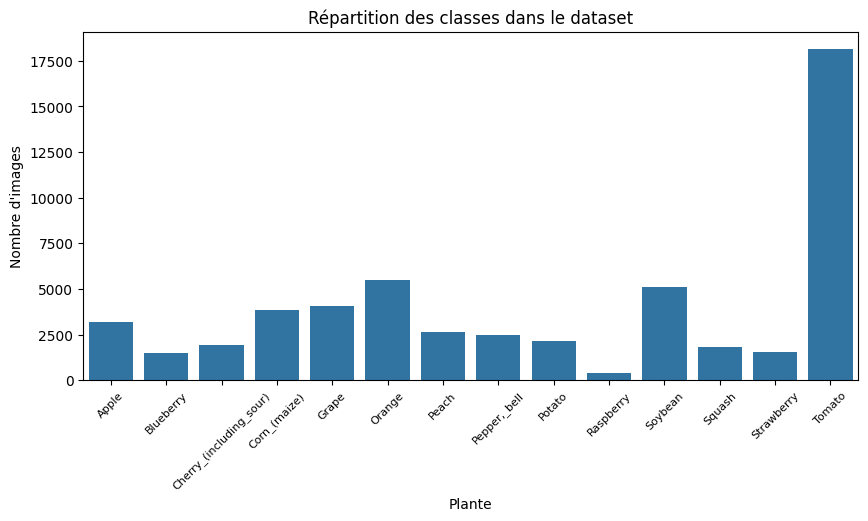

In [15]:
#Répartition des classes dans le dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Plante')
plt.title('Répartition des classes dans le dataset')
plt.xlabel('Plante')
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45, fontsize=8) 
plt.subplots_adjust(bottom=0.3)
plt.show()

In [24]:
df['Maladie/Statut'].value_counts()

Maladie/Statut
healthy                                 15083
Haunglongbing_(Citrus_greening)          5507
Bacterial_spot                           5421
Tomato_Yellow_Leaf_Curl_Virus            5357
Late_blight                              2908
Powdery_mildew                           2887
Early_blight                             2000
Black_rot                                1801
Septoria_leaf_spot                       1771
Spider_mites Two-spotted_spider_mite     1676
Target_Spot                              1404
Esca_(Black_Measles)                     1383
Common_rust_                             1192
Leaf_scorch                              1109
Leaf_blight_(Isariopsis_Leaf_Spot)       1076
Northern_Leaf_Blight                      985
Leaf_Mold                                 952
Apple_scab                                630
Cercospora_leaf_spot Gray_leaf_spot       513
Tomato_mosaic_virus                       373
Cedar_apple_rust                          275
Name: count, dtype:

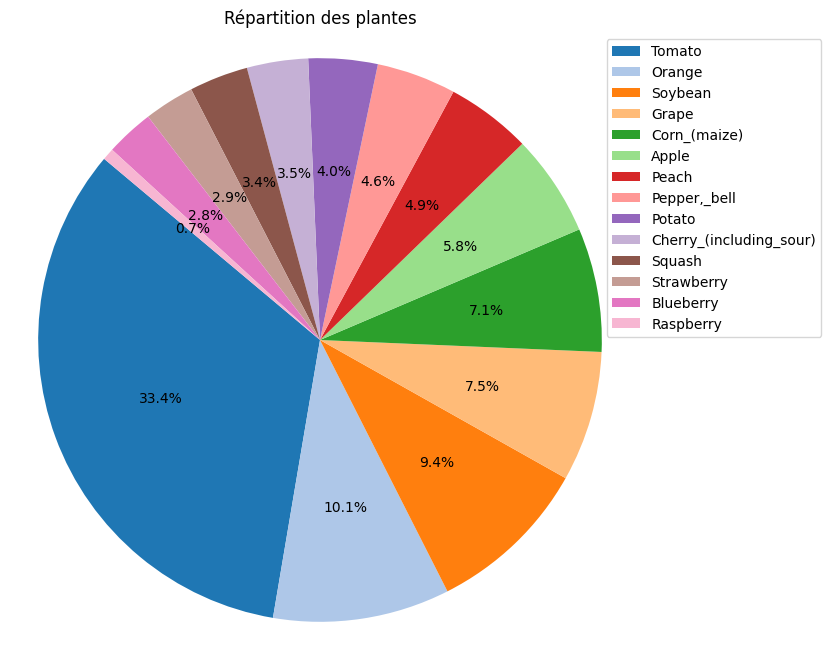

In [16]:
import matplotlib.pyplot as plt

# Calculer la proportion de chaque plante
plante_counts = df['Plante'].value_counts()

# Définir des couleurs pour chaque portion
colors = plt.cm.tab20.colors

# Créer un graphe en camembert
plt.figure(figsize=(8, 8))
plt.pie(plante_counts, labels=['']*len(plante_counts), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Répartition des plantes')

# Ajouter une légende en haut à droite avec un décalage
plt.legend(loc='upper right', labels=plante_counts.index, bbox_to_anchor=(1.32, 1))
plt.axis('equal')  
plt.show()

In [5]:
# Cacul des proportions de maladies par Plante
proportions = df.groupby(['Plante', 'Maladie/Statut']).size().unstack(fill_value=0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

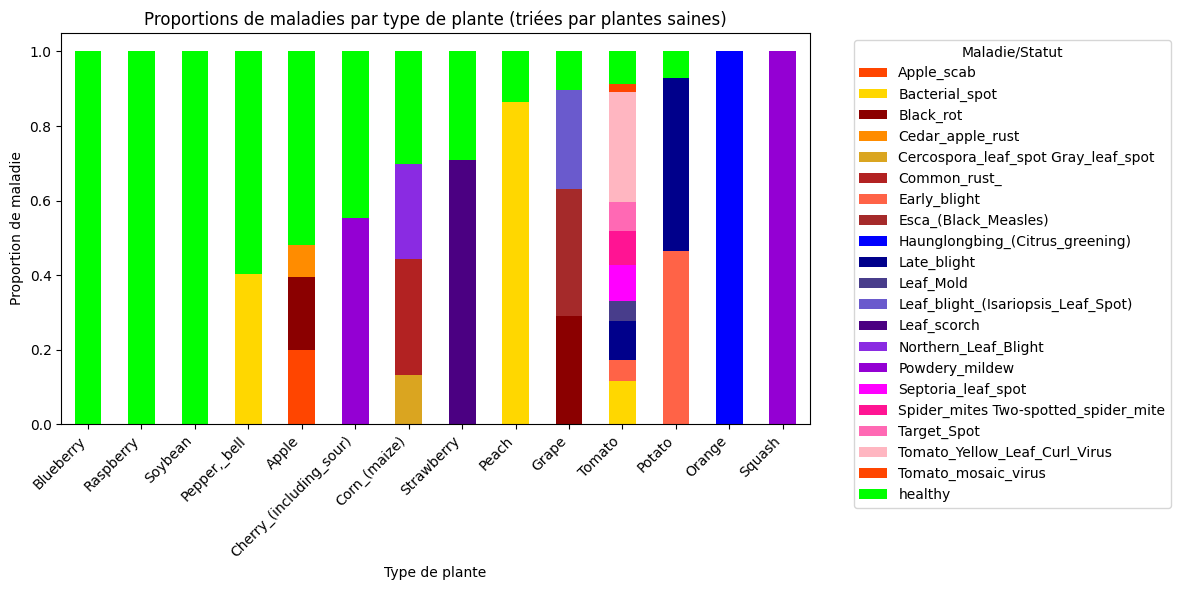

In [9]:
import matplotlib.pyplot as plt
# définition d'un dictionnaire de couleurs

colors = {
    'Apple_scab': '#FF4500',  # Rouge oranger
    'Bacterial_spot': '#FFD700',  # Or
    'Black_rot': '#8B0000',  # Rouge foncé
    'Cedar_apple_rust': '#FF8C00',  # Orange foncé
    'Cercospora_leaf_spot Gray_leaf_spot': '#DAA520',  # Doré
    'Common_rust_': '#B22222',  # Brique
    'Early_blight': '#FF6347',  # Tomate
    'Esca_(Black_Measles)': '#A52A2A',  # Marron
    'Haunglongbing_(Citrus_greening)': '#0000FF',  # Bleu
    'Late_blight': '#00008B',  # Bleu foncé
    'Leaf_Mold': '#483D8B',  # Bleu ardoise foncé
    'Leaf_blight_(Isariopsis_Leaf_Spot)': '#6A5ACD',  # Bleu ardoise
    'Leaf_scorch': '#4B0082',  # Indigo
    'Northern_Leaf_Blight': '#8A2BE2',  # Bleuet
    'Powdery_mildew': '#9400D3',  # Violet foncé
    'Septoria_leaf_spot': '#FF00FF',  # Magenta
    'Spider_mites Two-spotted_spider_mite': '#FF1493',  # Rose vif
    'Target_Spot': '#FF69B4',  # Rose clair
    'Tomato_Yellow_Leaf_Curl_Virus': '#FFB6C1',  # Rose pâle
    'Tomato_mosaic_virus': '#FF4500',  # Orange rougeâtre
    'healthy': '#00FF00'  # Vert
}
# Tri du dataframe par rapport à la proportion de plantes en bonne santé
sorted_proportions = proportions.sort_values(by='healthy', ascending=False)
# Création du graphique à barres
sorted_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Proportions de maladies par type de plante (triées par plantes saines)')
plt.xlabel('Type de plante')
plt.ylabel('Proportion de maladie')
plt.legend(title='Maladie/Statut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Recherche de doublons dans le jeu de données à partir du hash MD5
pd.set_option('display.max_colwidth', None)
duplicates = df.groupby(by='hash')[['Chemin']].count().reset_index()
duplicates = duplicates[duplicates['Chemin'] > 1]
duplicates.reset_index(drop=True, inplace=True)

duplicates = duplicates.merge(df[['Chemin', 'hash']], on='hash')
# Affichage des 10 premiers doublons
display(duplicates.head(10))
duplicates.info()

,hash,Chemin_x,Chemin_y
0,0b29a96c6ddbfa17b804fe09d7b5c5aa,2,D:\aprojet\fev24_cds_plants\data\color\Tomato___healthy\068e324c-faf6-40d6-8f83-578907f1cac5___GH_HL Leaf 466.1.JPG
1,0b29a96c6ddbfa17b804fe09d7b5c5aa,2,D:\aprojet\fev24_cds_plants\data\color\Tomato___healthy\34c81c57-e1fa-49dd-a49d-34fe8b2385fe___GH_HL Leaf 466.1.JPG
2,0ce1c770837fd4cd35cc0b7901da6a57,2,D:\aprojet\fev24_cds_plants\data\color\Tomato___Late_blight\48c55974-9fe9-4f4b-94f7-c8cd127d1e05___GHLB_PS Leaf 23.7 Day 13.jpg
3,0ce1c770837fd4cd35cc0b7901da6a57,2,D:\aprojet\fev24_cds_plants\data\color\Tomato___Late_blight\bd4f09bd-ee85-4ab1-bce0-8cde3fdd7f1b___GHLB_PS Leaf 23.7 Day 13.jpg
4,1987c933d1b47a1ef89727337ffdcc83,2,D:\aprojet\fev24_cds_plants\data\color\Apple___healthy\5192db55-4aa7-421c-92d4-c2dac79e7379___RS_HL 6273.JPG
5,1987c933d1b47a1ef89727337ffdcc83,2,D:\aprojet\fev24_cds_plants\data\color\Apple___healthy\9b75de13-d4b0-4b3f-988c-3e9926eef957___RS_HL 6273.JPG
6,1e86760b7721d066126b20056e8d5bb2,2,D:\aprojet\fev24_cds_plants\data\color\Apple___healthy\1ab5e019-e5f0-4d8e-a252-94cb0aab8b0a___RS_HL 6269.JPG
7,1e86760b7721d066126b20056e8d5bb2,2,D:\aprojet\fev24_cds_plants\data\color\Apple___healthy\3673d121-b5de-481c-b057-d4ee5b4959b1___RS_HL 6269.JPG
8,288508d7883f96452a46745acd3d00d1,2,D:\aprojet\fev24_cds_plants\data\color\Tomato___Late_blight\d6e6897a-5083-4914-9903-804c5684a956___GHLB2 Leaf 102.JPG
9,288508d7883f96452a46745acd3d00d1,2,D:\aprojet\fev24_cds_plants\data\color\Tomato___Late_blight\d81682aa-746b-4e07-af2b-52ebb6f4c017___GHLB2 Leaf 102.JPG


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hash      42 non-null     object
 1   Chemin_x  42 non-null     int64 
 2   Chemin_y  42 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB
